In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Set the option to display maximum rows to a high number
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)


#bring in the six packs
df = pd.read_csv('./Dataset/HousePrices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Assuming df is your DataFrame
import DataExplorationToolkit as dtl
feature_selector = dtl.FeatureSelector()

target="SalePrice"
num_features=5
list_to_drop=['Id']
top_featuers_names,df_top_features_names=feature_selector.most_important_features(df, target, num_features, list_to_drop)
print(top_featuers_names)
df_top_features_names

['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', 'GarageCars', 'GarageArea']


,Feature,Importance
15,OverallQual,0.578964
44,GrLivArea,0.110840
36,TotalBsmtSF,0.036816
42,2ndFlrSF,0.032516
32,BsmtFinSF1,0.030743
2,GarageCars,0.640409
3,GarageArea,0.623431


# Visualization

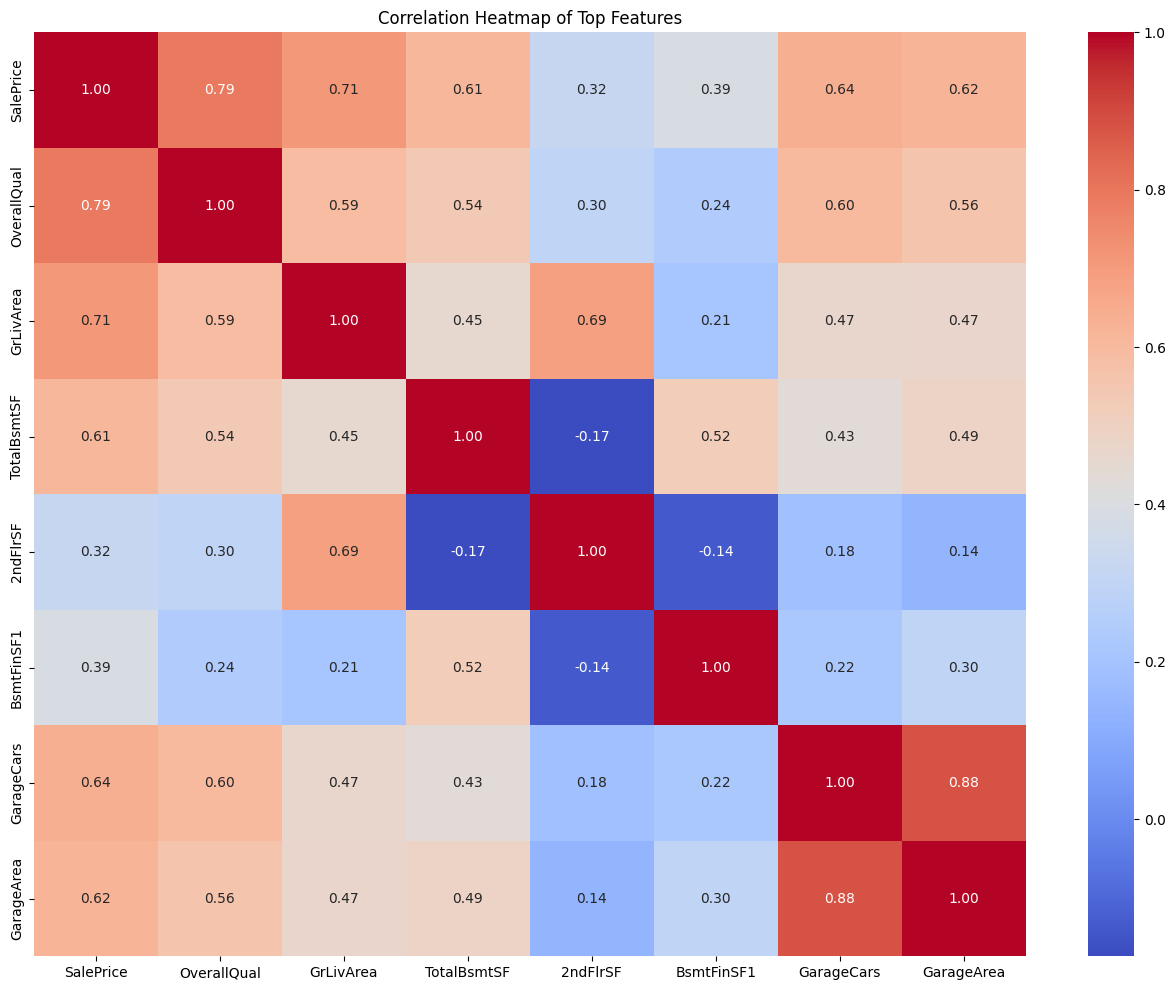

In [3]:
import DataExplorationToolkit as dtl
visualization=dtl.Visualization()
visualization.plot_correlation(df,target,top_featuers_names)

subset=[target]+top_featuers_names
df=df[subset]

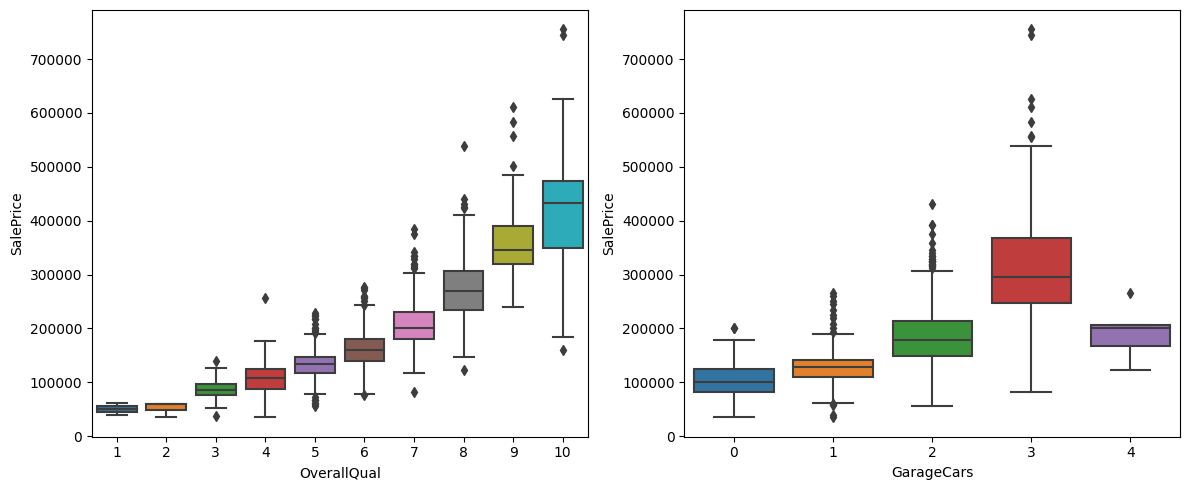

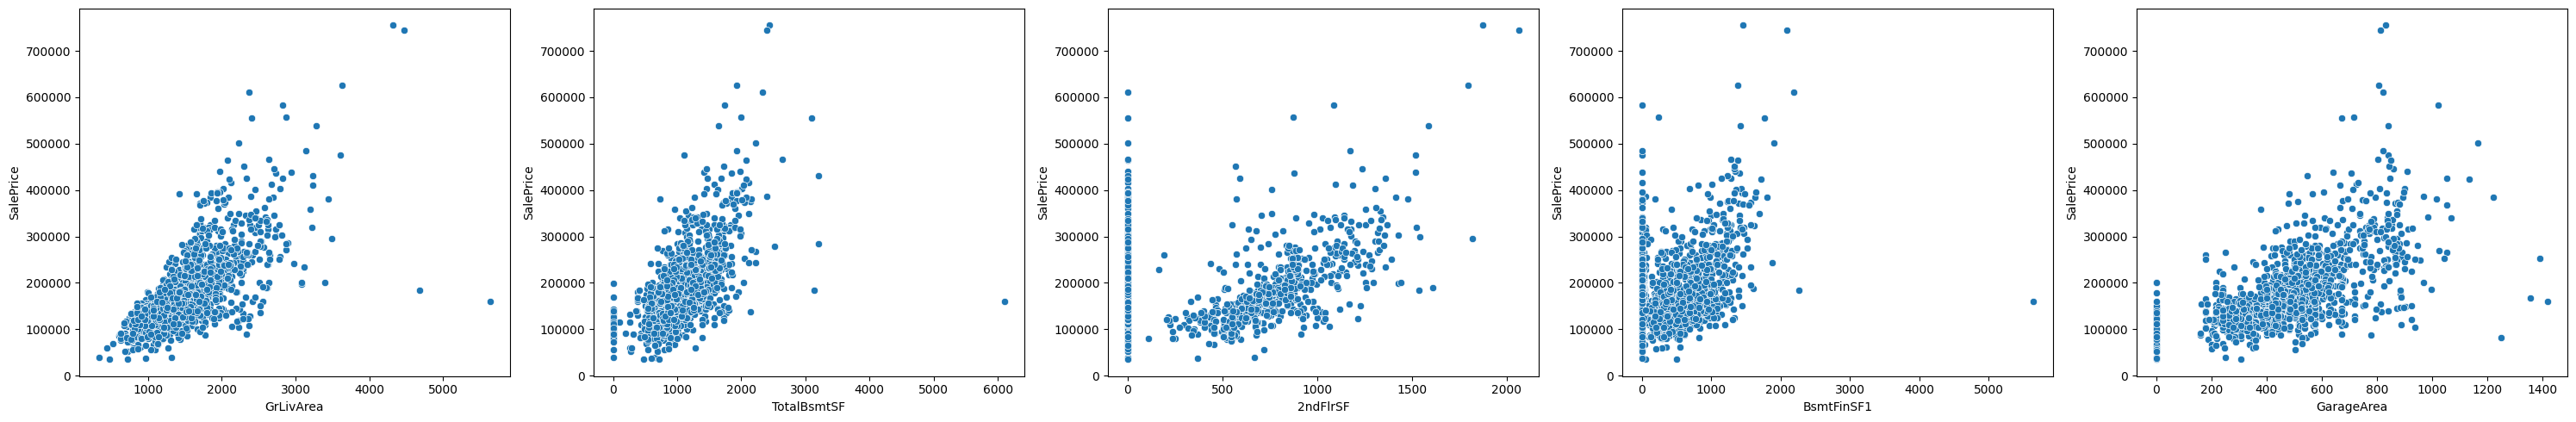

In [4]:
cat_cols,num_cols,text_cols=feature_selector.return_categorical_numerical_columns(df,['SalePrice'])

visualization.plot_relationship_cagorical_target_continuous(df,target,cat_cols)
visualization.plot_relationship_numerical_target_continuous(df,target,num_cols)

<Axes: xlabel='SalePrice', ylabel='Density'>

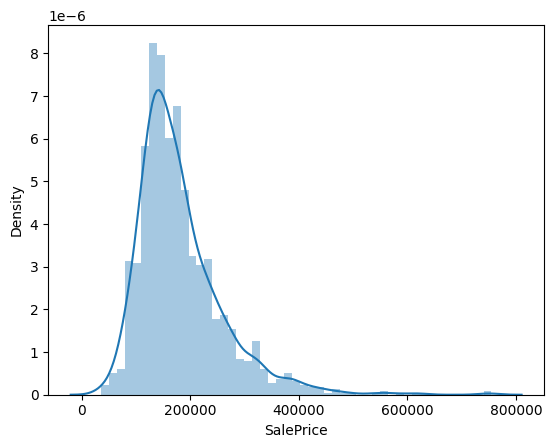

In [5]:
#histogram
import seaborn as sns
sns.distplot(df['SalePrice'])

In [6]:
df

,SalePrice,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,GarageCars,GarageArea
0,208500,7,1710,856,854,706,2,548
1,181500,6,1262,1262,0,978,2,460
2,223500,7,1786,920,866,486,2,608
3,140000,7,1717,756,756,216,3,642
4,250000,8,2198,1145,1053,655,3,836
...,...,...,...,...,...,...,...,...
1455,175000,6,1647,953,694,0,2,460
1456,210000,6,2073,1542,0,790,2,500
1457,266500,7,2340,1152,1152,275,1,252
1458,142125,5,1078,1078,0,49,1,240


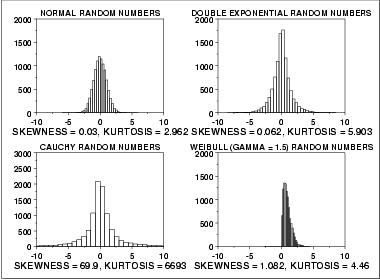

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [8]:
df.TotalBsmtSF.describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [18]:
import DataExplorationToolkit as dtl
transformation=dtl.Transformations()
var='TotalBsmtSF'
#var='SalePrice'
results=transformation.transform_skewness(df,var,flag_prints=True)
print(results[0])
print(results[3:])

Original Skew:  1.524254549062766
Original Kurtosis:  13.250483281984803
Skewness is to the Left
log_metric:
skew:  -5.821423348202299  - skewnewss:  -5.321423348202299
kurt:  32.84331812286074  - kurtosis:  -29.843318122860737
log_metric:  (-5.321423348202299, -29.843318122860737)
sqrt_metric:
skew:  -1.2721910873573878  - skewnewss:  -0.7721910873573878
kurt:  6.313389992976846  - kurtosis:  -3.3133899929768464
sqrt_metric:  (-0.7721910873573878, -3.3133899929768464)
Sqrt
(-1.2721910873573878, 6.313389992976846)


<Axes: xlabel='TotalBsmtSF', ylabel='Density'>

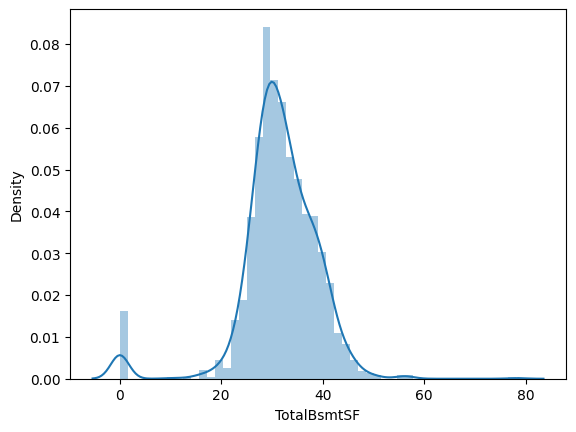

In [19]:
sns.distplot(results[2])

In [11]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
import numpy as np
from scipy.stats import ks_2samp

transformed_data_log = np.log(df[var])


# Sqrt Transformation 
transformed_data_sqrt = np.sqrt(df[var])

from scipy.stats import boxcox,yeojohnson,ks_2samp
transformed_data_yeojohnson, lambda_value_yeojohnson = yeojohnson(df[var])
var_yeojohnson=var+'_yeojohnson'
df[var_yeojohnson]=transformed_data_yeojohnson


# Calculate the Kolmogorov-Smirnov statistic
ks_statistic, pvalue = ks_2samp(transformed_data_log, np.random.normal(0, 1, len(transformed_data_log)))
ks_statistic2, pvalue2 = ks_2samp(transformed_data_sqrt, np.random.normal(0, 1, len(transformed_data_log)))
ks_statistic3, pvalue3 = ks_2samp(df[var_yeojohnson], np.random.normal(0, 1, len(df[var_yeojohnson])))



In [ ]:
cube_root_transformed_data = np.cbrt(df[var])
cube_root_transformed_data

0        9.494919
1       10.806535
2        9.725889
3        9.109767
4       10.461690
          ...    
1455     9.840813
1456    11.553001
1457    10.482966
1458    10.253519
1459    10.789382
Name: TotalBsmtSF, Length: 1460, dtype: float64

In [ ]:
print('ks_statistic: ',ks_statistic)
print('pvalue: ',pvalue)

print('ks_statistic2: ',ks_statistic2)
print('pvalue2: ',pvalue2)

print('ks_statistic3: ',ks_statistic3)
print('pvalue3: ',pvalue3)


ks_statistic:  0.9746575342465753
pvalue:  0.0
ks_statistic2:  0.9746575342465753
pvalue2:  0.0
ks_statistic3:  0.9746575342465753
pvalue3:  0.0


In [ ]:
import scipy.stats as stats

def check_normality(data_transformed, alpha=0.05):
    """
    Checks for normality using the Shapiro-Wilk test.

    Args:
        data_transformed (pd.Series): Transformed data to be checked for normality.
        alpha (float, optional): Significance level for the test. Default is 0.05.

    Returns:
        bool: True if data is normally distributed, False otherwise.
    """
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(data_transformed)

    # Compare p-value to significance level
    is_normal = p_value > alpha

    return stat, p_value


stat, p_value=check_normality(df[var_yeojohnson])
print("stat: ",stat)
print("p_value: ",p_value)

stat:  0.9376309514045715
p_value:  2.809284947570599e-24


In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

Skewness: 0.121335
Kurtosis: 0.809532


<Axes: xlabel='SalePrice', ylabel='Density'>

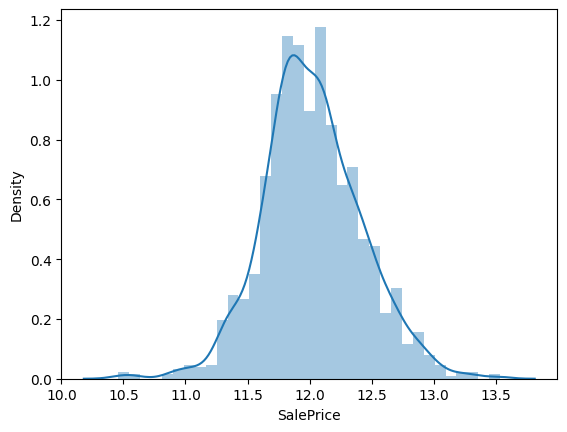

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % transformed_data_log.skew())
print("Kurtosis: %f" % transformed_data_log.kurt())

sns.distplot(transformed_data_log)

Skewness: -0.008653
Kurtosis: 0.877870


<Axes: xlabel='test', ylabel='Density'>

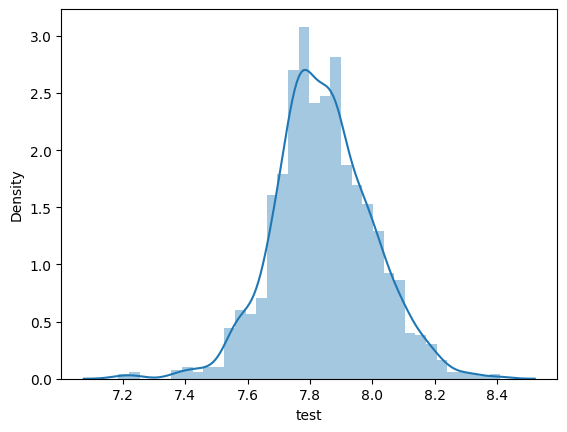

In [ ]:
df["test"]=transformed_data_boxcox
print("Skewness: %f" % df["test"].skew())
print("Kurtosis: %f" % df["test"].kurt())

sns.distplot(df['test'])


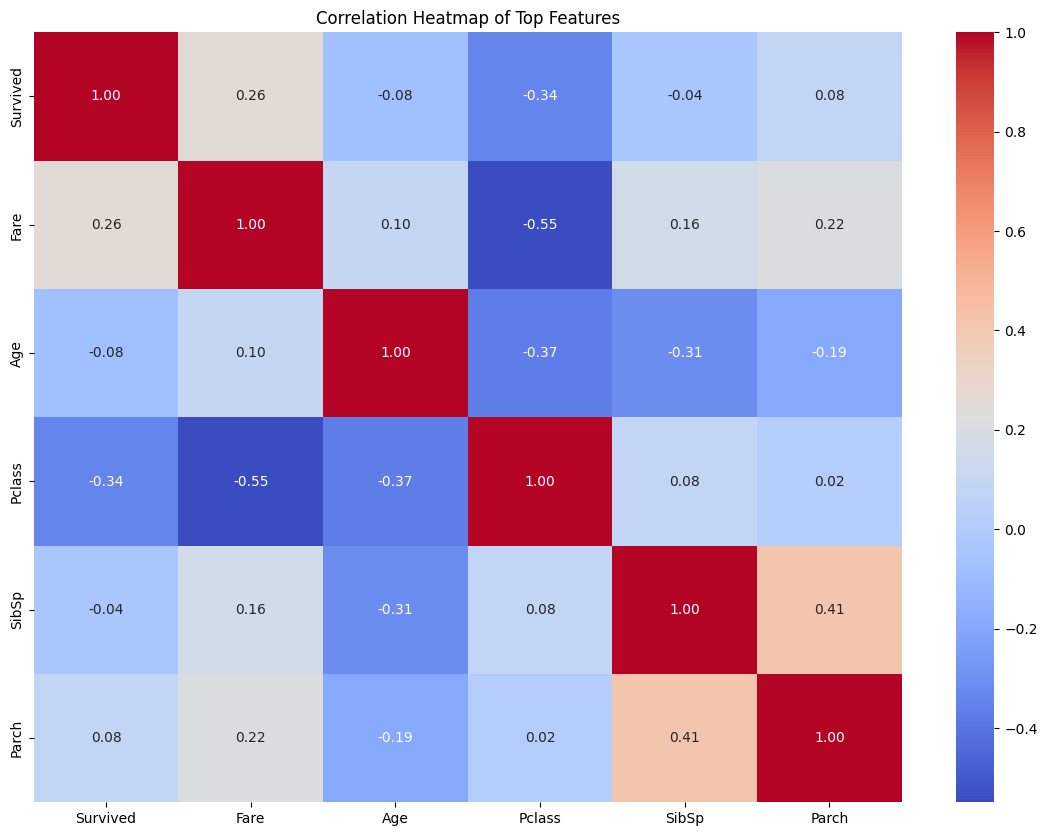

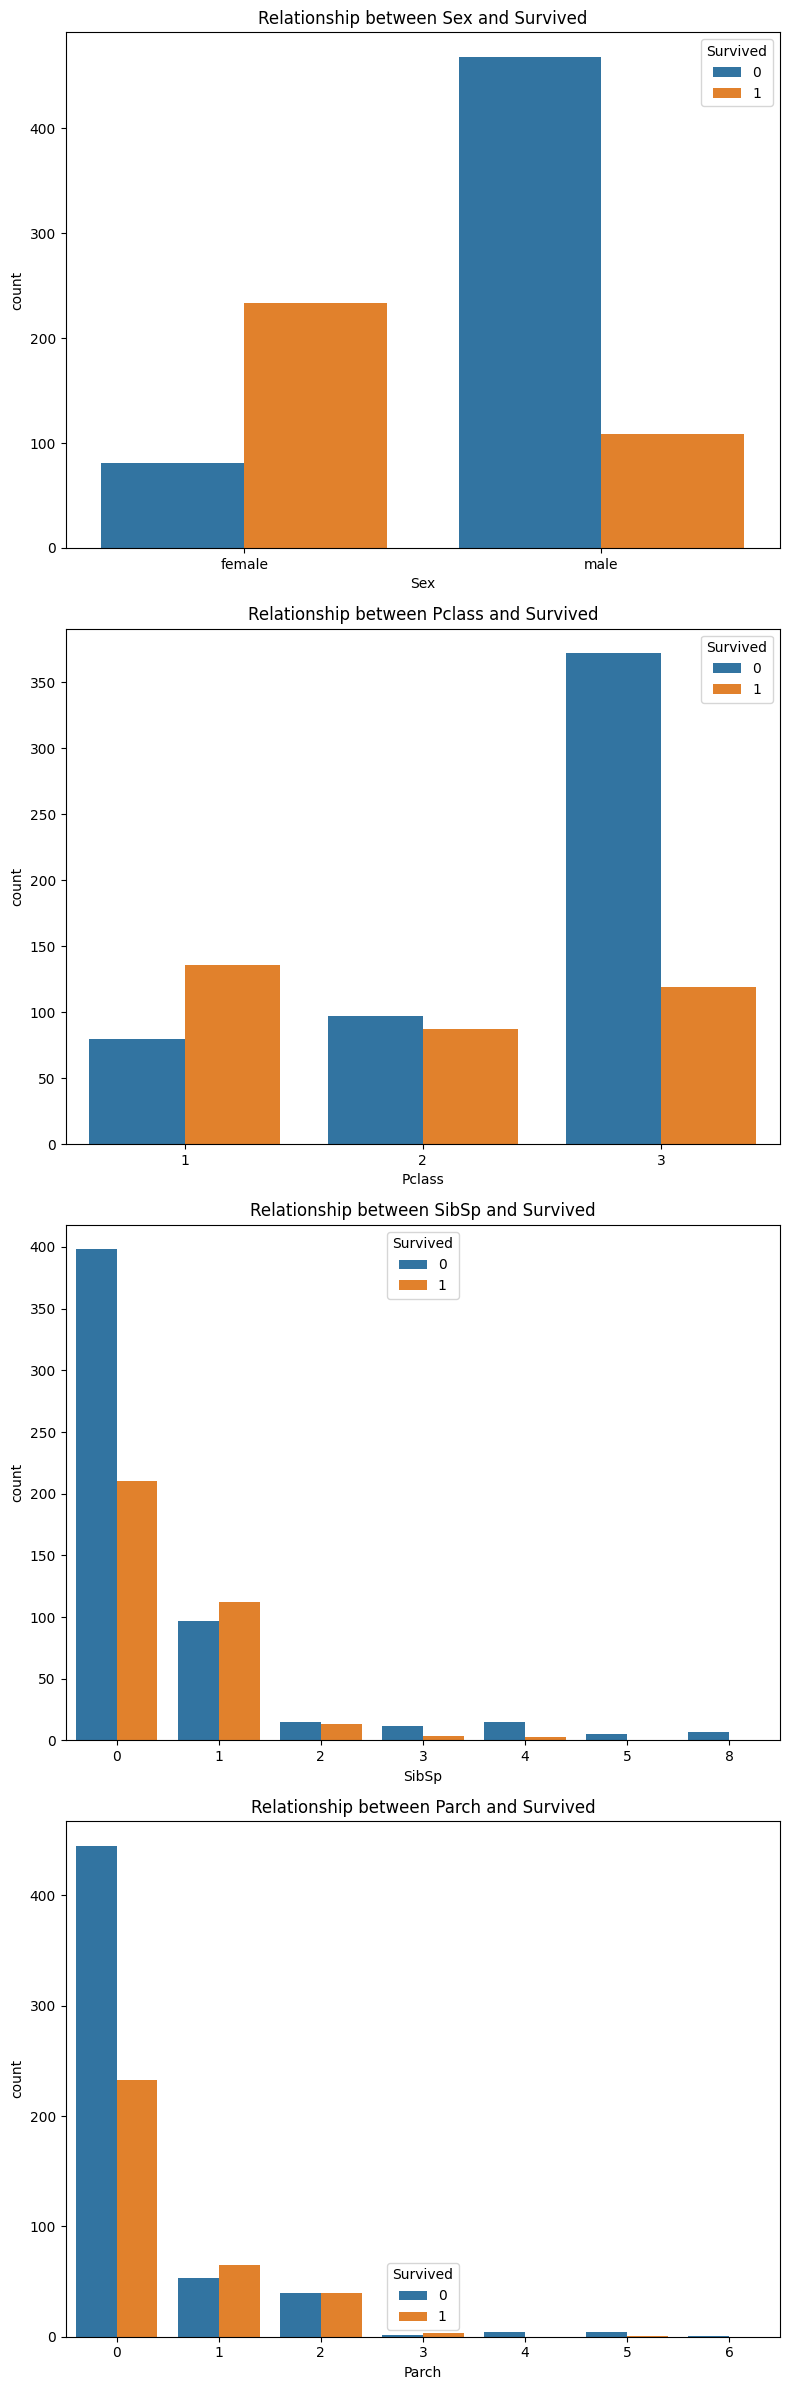

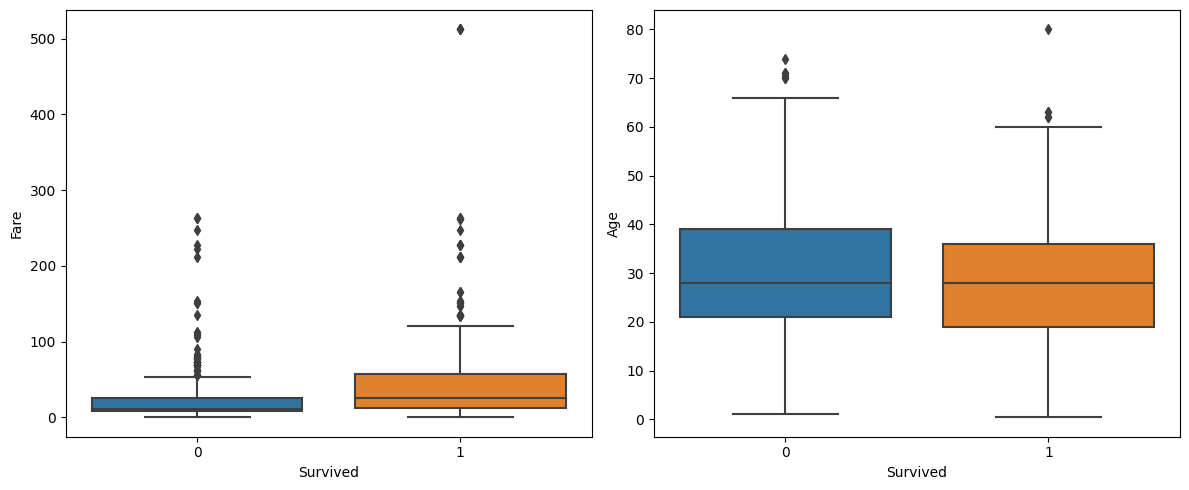

In [ ]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Set the option to display maximum rows to a high number
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)


#bring in the six packs
df = pd.read_csv('./Dataset/Titanic.csv')

# Assuming df is your DataFrame
import DataExplorationToolkit as dtl
feature_selector = dtl.FeatureSelector()

target="Survived"
num_features=5
list_to_drop=['PassengerId']
top_featuers_names,df_top_features_names=feature_selector.most_important_features(df, target, num_features, list_to_drop)


import DataExplorationToolkit as dtl
visualization=dtl.Visualization()
visualization.plot_correlation(df,target,top_featuers_names)

subset=[target]+top_featuers_names
df=df[subset]


cat_cols,num_cols,text_cols=feature_selector.return_categorical_numerical_columns(df,[target])

visualization.plot_relationship_categorical_target_binary(df,target,cat_cols)
visualization.plot_relationship_numerical_target_binary(df,target,num_cols)